In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from statistics import median
%matplotlib inline
import os
from prettytable import PrettyTable

In [2]:
def moving_avg(array, window_size):
    back = int(np.ceil(window_size))
    forward = int(np.floor(window_size))
    return [np.mean(array[max(0,i-back):i+forward]) for i in range(len(array))]

In [3]:
files = [['voltage_c2', 'climate2_baseline']]
legend_txt = ['RL', 'Baseline']

In [4]:
rl_buses = []
for pair in files:
    for file in pair:
        for home_file in os.listdir(f'models/{file}/homes'):
            if 'actions' in home_file:
                bus = int(home_file[3:6])
                cluster = int(home_file[6])
                rl_buses += [bus]
                

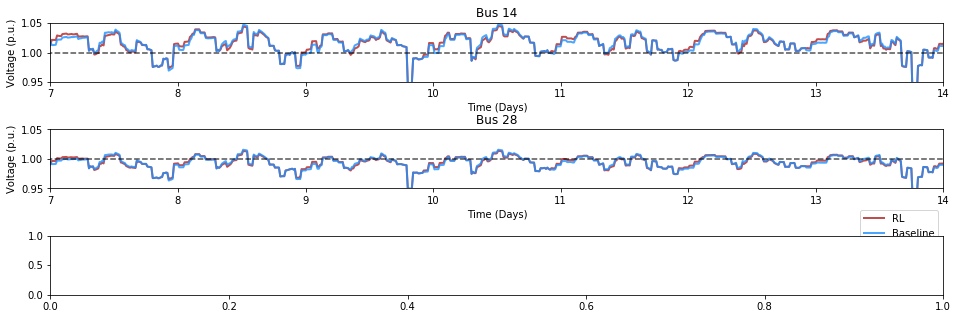

In [5]:
improved_buses = []
fig, ax = plt.subplots(2,1 ,figsize=(16,5))
plt.subplots_adjust(hspace=0.8)
for pair in files:
    diff = []
    improved = 0
    for j in range(len(pair)):
        file = pair[j]
        sk = (4*24*7) if not 'baseline' in file else 0
        data = np.genfromtxt(f'models/{file}/voltage.csv', delimiter=',', skip_header=sk)
        x = np.arange(len(data))/24/4
        diff += [data]
        i = -1
        for b in [14,28]: #range(33):
            i += 1
            c = ['firebrick','dodgerblue'][j]
            ax[i].plot(x, data[:,b],color=c, alpha=0.8, linewidth=2)
            if j == len(legend_txt)-1:
                ax[i].plot([0,60],[1,1], color='k',linestyle='--', alpha=0.4)
                ax[i].plot([0,60],[1,1], color='k',linestyle='--', alpha=0.4)
            ax[i].set_xlabel("Time (Days)")
            ax[i].set_ylabel("Voltage (p.u.)")
            ax[i].set_title(f"Bus {i}")
            ax[1].legend(legend_txt, loc='lower right', bbox_to_anchor=(1,-1))
            ax[i].set_xlim(7,14)
            
            ax[i].set_ylim(0.95,1.05)
            ax[i].set_ylabel('Voltage (p.u.)')
            ax[i].set_title(f'Bus {b}')

plt.savefig('bus_voltages.png')
plt.show()


0 [0, 0, 0] [0, 0, 0]
1 [0, 0, 0] [0, 0, 0]
2 [0, 0, 0] [0, 0, 0]
3 [0, 0, 0] [0, 0, 0]
4 [10, 10, 0] [0, 0, 0]
5 [37, 36, 0] [0, 0, 0]
6 [36, 36, 0] [0, 0, 0]
7 [57, 62, 0] [0, 0, 0]
8 [91, 93, 0] [0, 8, 0]
9 [108, 117, 0] [16, 37, 0]
10 [116, 122, 0] [17, 40, 0]
11 [134, 134, 0] [22, 53, 0]
12 [114, 121, 0] [182, 242, 0]
13 [94, 98, 0] [825, 800, 0]
14 [79, 82, 0] [1395, 1417, 0]
15 [91, 97, 0] [1306, 1345, 0]
16 [104, 113, 0] [1210, 1222, 0]
17 [107, 117, 0] [1183, 1197, 0]
18 [0, 0, 0] [0, 0, 0]
19 [0, 0, 0] [0, 0, 0]
20 [0, 0, 0] [0, 0, 0]
21 [0, 0, 0] [0, 0, 0]
22 [0, 0, 0] [0, 0, 0]
23 [0, 0, 0] [0, 0, 0]
24 [0, 0, 0] [0, 0, 0]
25 [42, 43, 0] [0, 0, 0]
26 [55, 57, 0] [0, 0, 0]
27 [108, 117, 0] [0, 0, 0]
28 [187, 181, 0] [0, 0, 0]
29 [231, 244, 0] [0, 0, 0]
30 [313, 309, 0] [0, 0, 0]
31 [339, 333, 0] [0, 0, 0]
32 [351, 345, 0] [0, 0, 0]


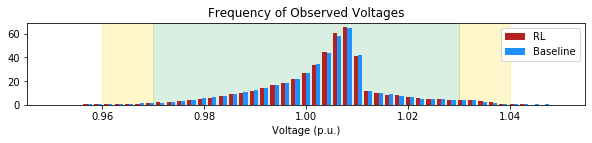

In [6]:
# fig,ax = plt.subplots(4, figsize=(5,10))
c = 0
for bus in range(33):
    c = [0,0,0]
    b = [0,0,0]
    for i in range(len(legend_txt)):
        for v in diff[i][:,bus]:
            if v < 0.97:
                b[i] += 1
            if v > 1.03:
                c[i] += 1
        if c[2]> 0:
            d = [c[0]/c[2],c[1]/c[2]]#/c[1]
        else:
            d = [0,0]
    print(bus, b, c)
# for i in range(4):
plt.figure(figsize=(10,3))
plt.axvspan(0.97, 1.03, alpha=0.2, color='mediumseagreen')
plt.axvspan(0.96, 0.97, alpha=0.2, color='gold')
plt.axvspan(1.03, 1.04, alpha=0.2, color='gold')
plt.hist([diff[0].flatten(),diff[1].flatten()],bins=np.linspace(0.95,1.05,50),color=['firebrick','dodgerblue'], density=True, label=legend_txt)
plt.legend()


plt.title('Frequency of Observed Voltages')
plt.xlabel('Voltage (p.u.)')
plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig('hist', dpi=300)

In [7]:
for item in diff[1:]:
    print(sum(i > 1.04 for i in item.flatten()), sum(i < 0.96 for i in item.flatten()))

812 1035


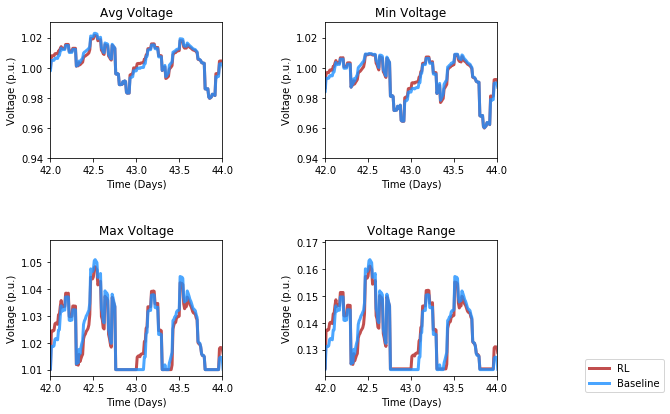

In [8]:
fig, ax = plt.subplots(2,2, figsize=(8,6.5))
plt.subplots_adjust(wspace=0.6, hspace=0.6)
xlims = [[42,44],[207,214]]
for j in range(1):
    for i in [0,1]:#range(4):
        c = ['firebrick','dodgerblue'][i]
        s = 96
        x = np.arange(diff[i].shape[0]-96*7)/s
        if j == 0:
            #ax[0].plot(x,diff[i][:,14][96*7:])
            ax[0][0].plot(x, np.mean(diff[i][96*7:], axis=1), color=c, alpha=0.8, linewidth=3)
            ax[0][1].plot(x, np.min(diff[i][96*7:], axis=1), color=c, alpha=0.8, linewidth=3)
            ax[1][0].plot(x, np.max(diff[i][96*7:], axis=1), color=c, alpha=0.8,linewidth=3)
            ax[1][1].plot(x, np.max(diff[i][96*7:]-np.min(diff[i][96*7:]), axis=1), color=c, linewidth=3,alpha=0.8)

    ax[0][0].set_title('Avg Voltage')
    ax[0][1].set_title('Min Voltage')
    ax[1][0].set_title('Max Voltage')
    ax[1][1].set_title('Voltage Range')
    for i in range(2):
        for j in range(2):
            ax[i][j].set_xlabel('Time (Days)')
            ax[i][j].set_ylabel('Voltage (p.u.)')
            ax[i][j].set_xlim(xlims[0])
    
ax[0][0].set_ylim(0.94,1.03)
ax[0][1].set_ylim(0.94,1.03)
# ax[2].set_ylim(1.0091,1.0509)
# ax[3].set_ylim(0.105,0.245)
ax[1][1].legend(legend_txt,loc='center right', bbox_to_anchor=(2, 0))
plt.savefig('summary.png')

139.4374808763616
139.9194403317099


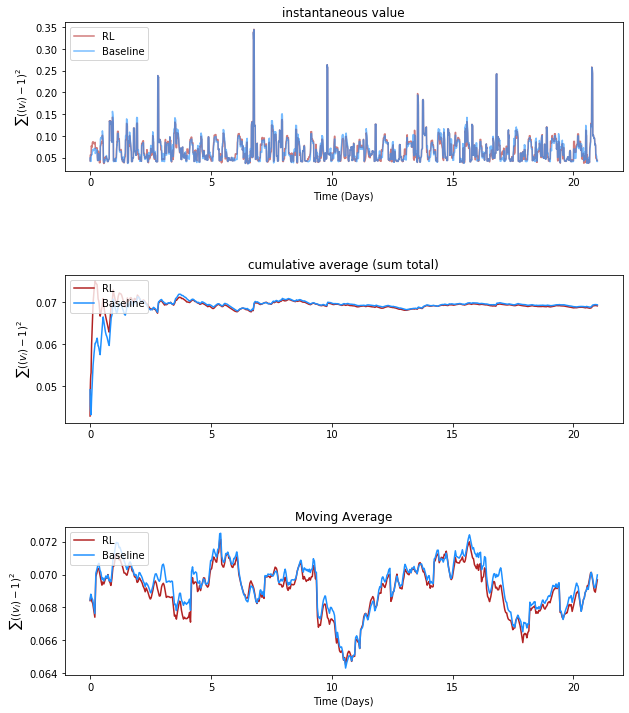

In [9]:
fig, ax = plt.subplots(3, figsize=(10,12))
plt.subplots_adjust(hspace=0.7)
# reward = []
for i in range(len(pair)):
#     reward = []
#     s =  2 if i == 0 else 1
    c = ['firebrick','dodgerblue','m'][i]
    reward = np.linalg.norm(np.subtract(diff[i],1.0),axis=1).tolist()[96*7:96*28]
#     reward += r[:15000]
    
    x = np.arange(len(reward))/96
    ax[0].plot(x,reward, color=c, alpha=0.6)
#     ax[0].set_xlim(7,8)
    ax[0].set_xlabel('Time (Days)')
    ax[1].plot(x,np.divide(np.cumsum(reward), np.arange(1,len(reward)+1)), color=c)
    print(sum(reward))
    ax[2].plot(x,moving_avg(reward, 250), color=c)
for i in range(3):
    ax[i].legend(legend_txt, loc='upper left')
    ax[i].set_ylabel(r'$\sum ((v_i)-1)^2 $')
ax[0].set_title("instantaneous value")
ax[1].set_title("cumulative average (sum total)")
ax[2].set_title("Moving Average")
ax[2].set_xlabel("Time (Days)")
plt.savefig('l2norm.png')

In [10]:
n_homes = np.nan
pair = files[0]
for file in pair:
    len_files = len(os.listdir(f'models/{file}/homes'))
    if len_files > n_homes or len_files < n_homes:
        print("Warning: The number of RL controlled homes is not the same for these files.")
    else:
        n_homes = len_files


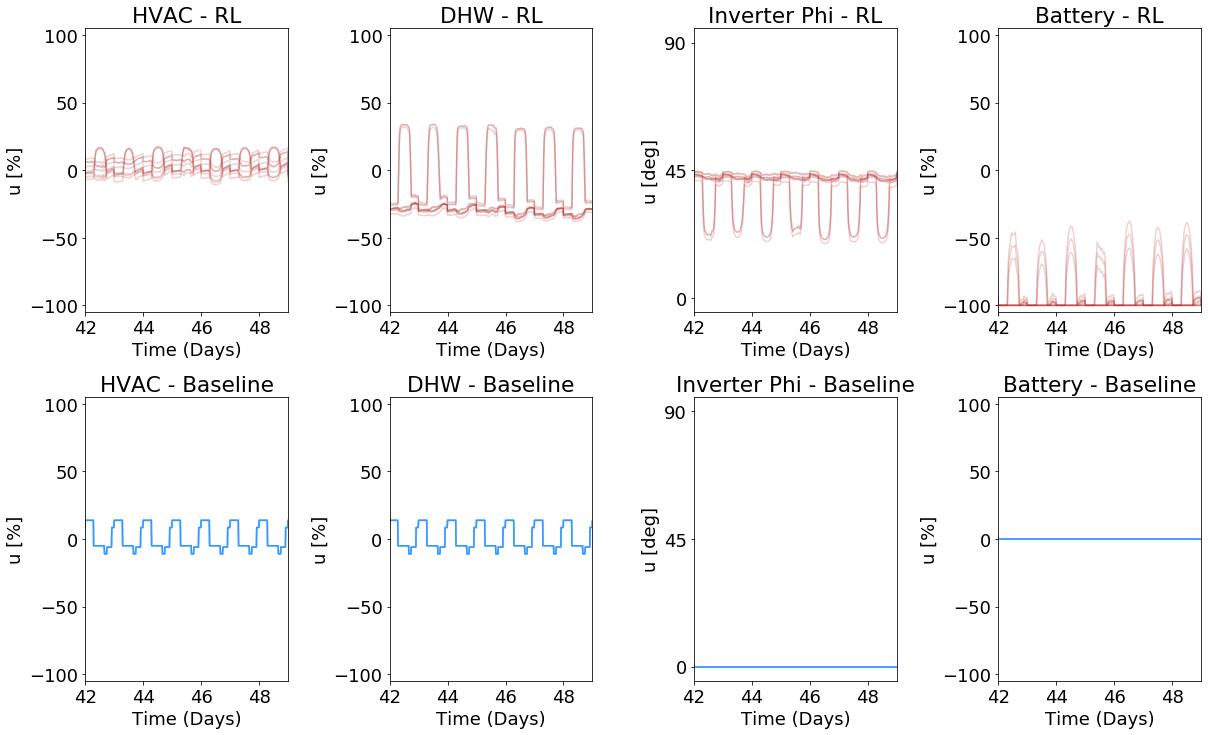

In [11]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
ll,ul = 42,49
action_order = ['HVAC', 'DHW', 'Inverter Phi', 'Battery']
#fig, ax = plt.subplots(int(0.5*n_homes), 5, figsize=(20,80))
fig, ax = plt.subplots(len(pair), 4, figsize=(20,12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
h = -1
for j in range(0,len(pair)):
    file = pair[j]
    per_day = 96 #if 'baseline' in file else 192
    x = np.arange(len(diff[j])-1)/per_day
    h=-1
    homes = os.listdir(f'models/{file}/homes')
    for home in homes:
        if 'action' in home:
            h += 1
            bus = int(home[4:6])
            actions = np.genfromtxt(f'models/{file}/homes/{home}', delimiter=',')
            for a in range(actions.shape[1]):
                c = ['firebrick','dodgerblue'][j]
                sc = 100 if not a == 2 else 45
                offset = 0 if not a == 2 else 45
                ax[j][a].plot(np.arange(len(actions[:,a]))/per_day, sc*actions[:,a]+offset, color=c, alpha=0.2)
                ax[j][a].set_xlabel("Time (Days)")

                ax[j][a].set_title(f"{action_order[a]} - {legend_txt[j]}")
                ax[j][a].set_xlim(ll,ul)

                ylim = [-105,105] if a != 2 else [-5,95]
                ax[j][a].set_ylim(ylim)
                ax[j][a].set_ylabel('u [%]')
                ax[j][a].set_xticks(np.arange(ll,ul)[::2])
                if a == 2:
                    ax[j][a].set_yticks([0,45,90])
                    ax[j][a].set_ylabel('u [deg]')
                
plt.savefig('actions.png')                

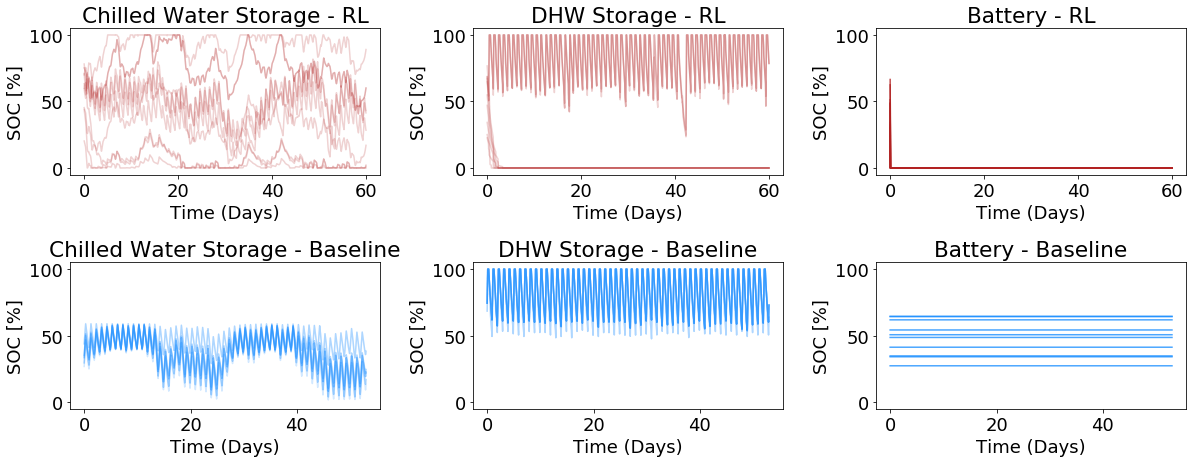

In [14]:
pv_total = np.zeros(1)
fig, ax = plt.subplots(len(legend_txt),3, figsize=(20,7))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

i = -1
h = 0

for file in pair:
    i += 1
    sk = 96*7 if 'baseline' in file else 0
    homes = os.listdir(f'models/{file}/homes')
    c = legend_txt[i]
    cl = ['firebrick','dodgerblue'][i]
    x = None
    for home in homes:
        if 'reward' in home:
            pass
        else:
            actions = np.genfromtxt(f'models/{file}/homes/{home}', delimiter=',', skip_header=sk)
            x = np.arange(len(actions))/96

            if 'hvac' in home:
                ax[i][0].plot(x,100*actions, c=cl,alpha=0.2)
                ax[i][0].set_title(f'Chilled Water Storage - {c}')

            elif 'dhw' in home:
                ax[i][1].plot(x,100*actions, c=cl,alpha=0.2)
                ax[i][1].set_title(f'DHW Storage - {c}')

#             elif 'pv' in home:
#                 ax[i][2].plot(x,actions, c=cl, alpha=0.2)
#                 ax[i][2].set_title(f'PV - {c}')

            elif 'batt' in home:
                ax[i][2].plot(x,100*actions, c=cl,alpha=0.8)
                ax[i][2].set_title(f'Battery - {c}')
    
for i in range(len(legend_txt)):
    for j in [0,1,2]:
        ax[i][j].set_xlabel('Time (Days)')
        ax[i][j].set_ylim(-5,105)
        ax[i][j].set_ylabel('SOC [%]')

plt.savefig('soc.png')

reward: 30026.91947797519
reward: 30665.150858466477


Text(0.5, 1.0, 'moving average (trend)')

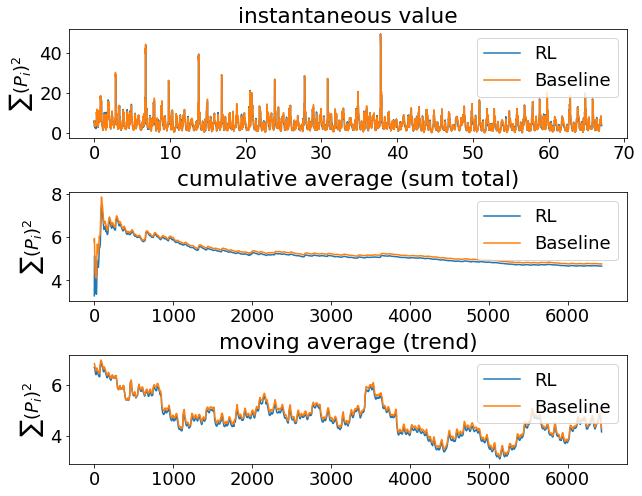

In [18]:
fig, ax = plt.subplots(3, figsize=(10,8))
fig.subplots_adjust(hspace=0.5)
for pair in files:
    for file in pair:
        sk = 96*7 if not 'baseline' in file else 0
        load = np.genfromtxt(f'models/{file}/load.csv', delimiter=',', skip_header=sk)
        gen = np.genfromtxt(f'models/{file}/solar.csv', delimiter=',', skip_header=sk)
        x = np.arange(len(load)) / 96
        ax[0].plot(x,np.square(load-gen))
        ax[1].plot(np.cumsum(np.square(load-gen))/(np.arange(len(load))+1))
        ax[2].plot(moving_avg(np.square(load-gen), 200))
        print("reward:",(np.sum(np.square(load-gen))))
#         print("average:",np.mean(load-gen))
for i in range(3):
    ax[i].legend(legend_txt)
    ax[i].set_ylabel(r'$\sum (P_i)^2 $')
ax[0].set_title("instantaneous value")
ax[1].set_title("cumulative average (sum total)")
ax[2].set_title("moving average (trend)")